In [9]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import medmnist
from medmnist import INFO, Evaluator
from sklearn.utils import shuffle
import seaborn as sns
from models.classifier import Encoder, Regressor
import torch.optim as optim
from torch.utils.data import DataLoader
from torch.autograd import Variable
import torch.nn as nn
from torch.utils.data import Dataset
import torch
sns.set_style("whitegrid")

(34581, 28, 28) (34581, 1)
(17778, 28, 28) (17778, 1)
(6491, 28, 28) (6491, 1)
(58850, 28, 28) (58850, 1)
-0.46570450924635015
0.5342954907536499
(11,)
(11,)


Text(0.5, 1.0, 'OrganAmnist Distribution')

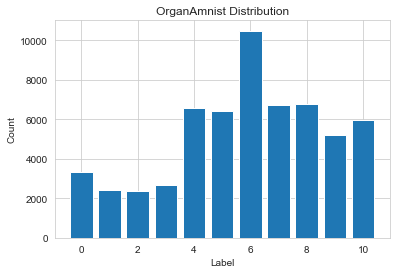

In [10]:
data = np.load('organamnist.npz')
X = data['train_images']
y = data['train_labels']
print(X.shape, y.shape)
X_2 = data['test_images']
y_2 = data['test_labels']
print(X_2.shape, y_2.shape)
X_3 = data['val_images']
y_3 = data['val_labels']
print(X_3.shape, y_3.shape)

X = np.append(X, X_2, axis=0)
y = np.append(y, y_2, axis=0)
X = np.append(X, X_3, axis=0)
y = np.append(y, y_3, axis=0)
print(X.shape, y.shape)

X, y = shuffle(X, y)
# Make X zero mean and unit std
X = X/np.max(X)
X = X - np.mean(X)
print(np.min(X))
print(np.max(X))

vals = np.unique(y)
totals = np.array([np.sum(np.where(y==i, 1, 0)) for i in range(0, 11)])
print(vals.shape)
print(totals.shape)
plt.bar(vals, totals)
plt.ylabel('Count')
plt.xlabel('Label')
plt.title('OrganAmnist Distribution')

In [11]:
X_1, y_1 = X[:8400], y[:8400]
X_2, y_2 = X[8400:8400*2], y[8400:8400*2]
X_3, y_3 = X[8400*2:8400*3], y[8400*2:8400*3]
X_4, y_4 = X[8400*3:8400*4], y[8400*3:8400*4]
X_5, y_5 = X[8400*4:8400*5], y[8400*4:8400*5]
X_6, y_6 = X[8400*5:8400*6], y[8400*5:8400*6]
X_7, y_7 = X[8400*6:8400*7], y[8400*6:8400*7]

In [12]:
# Domain 1 
# Split into train and test sets 
print(X_1.shape)
X_1_train, y_1_train = X_1[:6000], y_1[:6000]
X_1_test, y_1_test = X_1[6000:], y_1[6000:]
print(X_1_train.shape, X_1_test.shape)
print(y_1_train.shape, y_1_test.shape)

np.save('X_1_train', X_1_train)
np.save('X_1_test', X_1_test)
np.save('y_1_train', y_1_train)
np.save('y_1_test', y_1_test)

(8400, 28, 28)
(6000, 28, 28) (2400, 28, 28)
(6000, 1) (2400, 1)


In [13]:
# Domain 2 - Decreased contrast
# Split into train and test sets 
print(X_2.shape)
print(X_2.max())
print(X_2.min())
X_2_shift = X_2/X_2.max() * 0.40

print(X_2_shift.max())
print(X_2_shift.min())

X_2_train, y_2_train = X_2_shift[:6000], y_2[:6000]
X_2_test, y_2_test= X_2_shift[6000:], y_2[6000:]
print(X_2_train.shape, X_2_test.shape)
print(y_2_train.shape, y_2_train.shape)

np.save('X_2_train', X_2_train)
np.save('X_2_test', X_2_test)
np.save('y_2_train', y_2_train)
np.save('y_2_test', y_2_test)

(8400, 28, 28)
0.5342954907536499
-0.46570450924635015
0.4
-0.3486494026662671
(6000, 28, 28) (2400, 28, 28)
(6000, 1) (6000, 1)


In [14]:
# Domain 3 - Increase contrast
# Split into train and test sets 
print(X_3.shape)
print(X_3.max())
print(X_3.min())
X_3_shift = X_3/X_3.max() * 1.1

print(X_3_shift.max())
print(X_3_shift.min())

X_3_train, y_3_train = X_3_shift[:6000], y_3[:6000]
X_3_test, y_3_test = X_3_shift[6000:], y_3[6000:]
print(X_3_train.shape, X_3_test.shape)
print(y_3_train.shape, y_3_test.shape)

np.save('X_3_train', X_3_train)
np.save('X_3_test', X_3_test)
np.save('y_3_train', y_3_train)
np.save('y_3_test', y_3_test)

(8400, 28, 28)
0.5342954907536499
-0.46570450924635015
1.1
-0.9587858573322345
(6000, 28, 28) (2400, 28, 28)
(6000, 1) (2400, 1)


In [15]:
# Domain 4 - noise gaussian blur
from scipy.ndimage import gaussian_filter

# Split into train and test sets 
X_4_blur = np.zeros_like(X_4)
for i in range(0, X_4_blur.shape[0]):
    sampl = np.random.uniform(low=0.25, high=0.75, size=(1,))
    result = gaussian_filter(X_4[i], sigma=sampl[0])
    X_4_blur[i] = result

X_4_train, y_4_train = X_4_blur[:6000], y_4[:6000]
X_4_test, y_4_test = X_4_blur[6000:], y_4[6000:]
print(X_4_train.shape, X_4_test.shape)
print(y_4_train.shape, y_4_test.shape)

np.save('X_4_train', X_4_train)
np.save('X_4_test', X_4_test)
np.save('y_4_train', y_4_train)
np.save('y_4_test', y_4_test)


(6000, 28, 28) (2400, 28, 28)
(6000, 1) (2400, 1)


In [16]:
# Domain 5
# Split into train and test sets 
print(X_5.shape)
noise = np.random.normal(scale=0.1, size=(X_5.shape))
X_5_noise = X_5 + noise

X_5_train, y_5_train = X_5_noise[:6000], y_5[:6000]
X_5_test, y_5_test = X_5_noise[6000:], y_5[6000:]
print(X_5_train.shape, X_5_test.shape)

np.save('X_5_train', X_5_train)
np.save('X_5_test', X_5_test)
np.save('y_5_train', y_5_train)
np.save('y_5_test', y_5_test)


(8400, 28, 28)
(6000, 28, 28) (2400, 28, 28)
